# Experimentación de dos variables

## Importando bibliotecas
- <b>Pandas</b>: Nos sirve para leer datos y filtrarlos.
- <b>Seaborn</b>: Es una biblioteca para graficar que nos permite interactuar con datos de Pandas.

- <i>Numpy y Matplotlib son dependencias de Pandas.</i>


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Leyendo resultados
Primero, leemos el archivo de resultados de ejecución de bt. Para esto, vamos a abrirlo con Pandas y guardarlo en un DataFrame (df).

In [5]:
df = pd.read_csv("tp2/complejidades_array.csv")
df['t'] = df['tiempo']
print(df)

     fila  columna        tiempo             t
0       2        2      0.026156      0.026156
1       2       22      0.198611      0.198611
2       2       42      0.383137      0.383137
3       2       62      0.618534      0.618534
4       2       82      0.824701      0.824701
5       2      102      0.996703      0.996703
6       2      122      1.354670      1.354670
7       2      142      1.584570      1.584570
8       2      162      1.864440      1.864440
9       2      182      2.093350      2.093350
10      2      202      2.380400      2.380400
11      2      222      2.685410      2.685410
12      2      242      3.308750      3.308750
13      2      262      3.710980      3.710980
14      2      282      4.038080      4.038080
15      2      302      4.370690      4.370690
16      2      322      4.775910      4.775910
17      2      342      5.173830      5.173830
18      2      362      5.590170      5.590170
19      2      382      6.072180      6.072180
20      2    

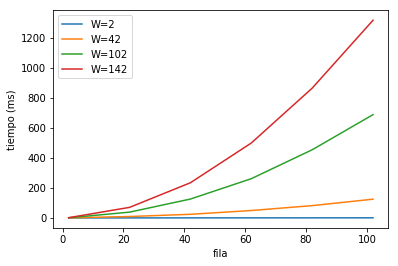

In [7]:
# Graficamos el tiempo en función de n, con series variando m.
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 2]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 42]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 102]);
ax1 = sns.lineplot(x="fila", y="tiempo", data=df.loc[df['columna'] == 142]);
ax1.legend(["W=2", "W=42", "W=102", "W=142"]);
plt.ylabel("tiempo (ms)");

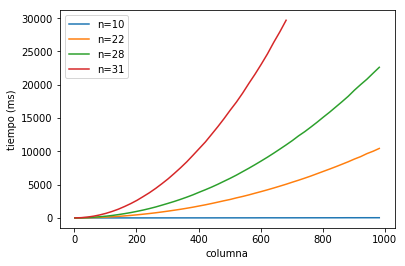

In [8]:
# Graficamos el tiempo en función de m, con series variando n.
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 2]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 42]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 62]);
ax1 = sns.lineplot(x="columna", y="tiempo", data=df.loc[df['fila'] == 102]);
ax1.legend(["n=10", "n=22", "n=28" , "n=31"]);
plt.ylabel("tiempo (ms)");

Al igual que en $meet$-$in$-$the$-$middle$, y como mencionamos en el gráfico anterior, notamos un comportamiento errático para un mismo $n$ con distintos $W$. Esto refuerza nuestra hipótesis del párrafo anterior, por lo que utilizaremos la experimentación descrita para corroborarla o refutarla.

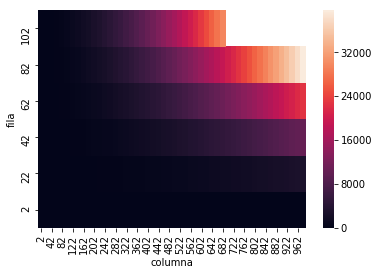

In [9]:
heat_df = df.pivot("fila", "columna", "t");
ax = sns.heatmap(heat_df)
ax.invert_yaxis()

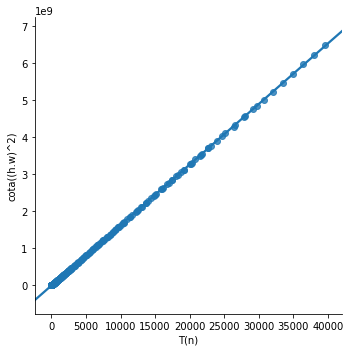

In [13]:
df["cota"] =((df["fila"])**2 * (df["columna"])**2);
# Grafico correlación.
ax1 = sns.lmplot(x='tiempo', y='cota', data=df);
plt.xlabel("T(n)");
plt.ylabel("cota((h.w)^2)");

In [18]:
df2 = df.loc[df['columna'] <= 102]
r = np.corrcoef(df2["t"], df2["cota"])[0, 1];
print("El coeficiente de correlación de Pearson es: r="+str(r))

El coeficiente de correlación de Pearson es: r=0.9998137512890153
